In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.applications import resnet50, VGG16 , InceptionV3, Xception
from tensorflow.keras.layers import Dense,Conv2D,Flatten,BatchNormalization,Dropout,MaxPooling2D,AveragePooling2D,Activation


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.utils import to_categorical
from keras.models import Model
import tensorflow as tf
import os
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [3]:
basedir = "../input/yoga-poses-dataset/DATASET" #here below the train and validation data

In [4]:
def removeCorruptedImages(path):
    for filename in os.listdir(path):
        try:
            img = Image.open(os.path.join(path,filename))
            img.verify() 
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)
            os.remove(os.path.join(path,filename))

In [5]:
traindir = os.path.join(basedir,'TRAIN') # root for training
validdir = os.path.join(basedir,'TEST') # root for testing

In [6]:
removeCorruptedImages(os.path.join(traindir,'downdog'))
removeCorruptedImages(os.path.join(traindir,'goddess'))
removeCorruptedImages(os.path.join(traindir,'plank'))
removeCorruptedImages(os.path.join(traindir,'tree'))
removeCorruptedImages(os.path.join(traindir,'warrior2'))
removeCorruptedImages(os.path.join(validdir,'downdog'))
removeCorruptedImages(os.path.join(validdir,'goddess'))
removeCorruptedImages(os.path.join(validdir,'plank'))
removeCorruptedImages(os.path.join(validdir,'tree'))
removeCorruptedImages(os.path.join(validdir,'warrior2'))

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  "Possibly corrupt EXIF data.  "


In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
bx=16
train_datagen = train_datagen.flow_from_directory(
                  directory='../input/yoga-poses-dataset/DATASET/TRAIN',
                  target_size=(300,300),
                  batch_size=bx,
                  shuffle=True,
                  class_mode='categorical')

val_datagen = test_datagen.flow_from_directory(
                directory='../input/yoga-poses-dataset/DATASET/TEST',
                target_size=(300,300),
                batch_size=bx,
                shuffle=False,
                class_mode='categorical')

Found 1081 images belonging to 5 classes.
Found 470 images belonging to 5 classes.


In [9]:
base_model =  Xception(weights='../input/keras-pretrained-models/xception_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(300, 300, 3))

In [10]:
model = Sequential()
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(5))
model.add(Activation('softmax'))



model = Model(inputs=base_model.input, outputs=model(base_model.output))


optimizers = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
losss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2, from_logits=True)
model.compile(loss=losss,
             optimizer=optimizers
            ,metrics=['accuracy'])

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [11]:
Hist=model.fit_generator(generator=train_datagen,
                    validation_data=val_datagen,
                    epochs=15
                    )

Epoch 1/15
 9/68 [==>...........................] - ETA: 30s - loss: 1.6201 - accuracy: 0.1736

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


68/68 [==============================] - 63s 920ms/step - loss: 1.5313 - accuracy: 0.3839 - val_loss: 1.3781 - val_accuracy: 0.6957
Epoch 2/15
68/68 [==============================] - 60s 876ms/step - loss: 1.3387 - accuracy: 0.7123 - val_loss: 1.2260 - val_accuracy: 0.8723
Epoch 3/15
68/68 [==============================] - 59s 866ms/step - loss: 1.2641 - accuracy: 0.7993 - val_loss: 1.1750 - val_accuracy: 0.9255
Epoch 4/15
68/68 [==============================] - 59s 868ms/step - loss: 1.2362 - accuracy: 0.8252 - val_loss: 1.1512 - val_accuracy: 0.9234
Epoch 5/15
68/68 [==============================] - 60s 877ms/step - loss: 1.2117 - accuracy: 0.8455 - val_loss: 1.1496 - val_accuracy: 0.9191
Epoch 6/15
68/68 [==============================] - 59s 872ms/step - loss: 1.1903 - accuracy: 0.8705 - val_loss: 1.1340 - val_accuracy: 0.9426
Epoch 7/15
68/68 [==============================] - 59s 862ms/step - loss: 1.1718 - accuracy: 0.8973 - val_loss: 1.1301 - val_accuracy: 0.9468
Epoch 8/15

In [12]:
model.save("Yoga_Detection1.hdf5")

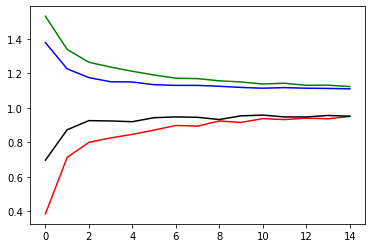

In [13]:
plt.figure(0)
plt.plot(Hist.history['loss'],'g')
plt.plot(Hist.history['val_loss'],'b')
plt.plot(Hist.history['accuracy'],'r')
plt.plot(Hist.history['val_accuracy'],'black')
plt.show()